In [1]:
import numpy as np
from diffusionpy import Diffusion_MS_iter,D_Matrix,Diffusion_MS,vpure,lngi,dlnai_dlnxi,time_dep_surface
import matplotlib.pyplot as plt

In [2]:
nc=2
L=0.016
wi0=np.asarray([0.9,0.1])
wi8=np.asarray([0.04,0.96])
Mi=np.asarray([18.015,65000])

In [3]:
mobile=np.asarray([True,False])
T=303.15
p=1E5
nt=300

In [4]:
# texp=np.asarray([ 0., 2790.,  4410.,  6570.,  9660., 11910., 15630., 17820., 22620., 27960.,32280., 36720., 41040., 97920.])
texp=np.asarray([ 0, 3600,   7200,  11580,  15000,  17760,  19800,  24600,  28200,31800,  34200,  37800,  41460,  45240,  48600, 106800])
# ww_exp=np.asarray([0.95,0.94981791, 0.94952408, 0.94898034, 0.94791589, 0.94813047,0.94697211, 0.94674376, 0.94614307, 0.94404476, 0.93323287,0.92318329, 0.90732405, 0.09724013])
ww_exp=np.asarray([0.9,0.89299418, 0.88460461, 0.88365329, 0.866351 ,0.86052165 ,0.85309549 , 0.83375686, 0.80719971, 0.77584219, 0.75664025,0.71118538, 0.64861202, 0.56269132, 0.34671022, 0.03925336])
t=np.linspace(0.,texp[-1],nt)

In [5]:
kij=D_Matrix(np.asarray([-0.156]),nc)
par={"mi":np.asarray([1.20469,2420.99]),
"si": np.asarray([2.797059952,2.947]),
"ui" :np.asarray([353.95,205.27]),
"eAi" :np.asarray([2425.67,0.]),
"kAi":np.asarray([0.04509,0.02]),
"NAi":np.asarray([1.,653.]),
"Mi": Mi,
"kij":kij}

In [6]:
vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi :lngi(T,wi,**par)
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi(T,wi,**par)

In [7]:
Dvec=np.asarray([5.6E-10])
taui=np.asarray([21711.02587])

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1629497 seconds ----------------


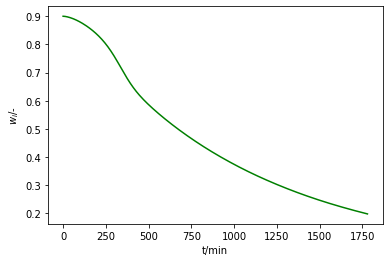

In [16]:
witB=time_dep_surface(t,wi0,wi8,mobile,taui,lngi_fun=None)
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,witB=witB)
fig,ax=plt.subplots()
ax.plot(t/60,wt[:,0],'g',label="Ideal and wiB(t)")
plt.xlabel('t/min')
plt.ylabel('$w_i$/-')

In [9]:
Dvec=np.asarray([5E-9])
# taui=np.asarray([35711.02587])
taui=np.asarray([21711.02587])

In [10]:
witB=time_dep_surface(t,wi0,wi8,mobile,taui,lngi_fun=None)

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2720966 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2454788 seconds ----------------
iter 0: ||F|| = 0.00724404, sigma = 1
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3010875 seconds ----------------
iter 1: ||F|| = 0.00723297, sigma = 653.616
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3311062 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3811882 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2412612 seconds ----------------
iter 2: ||F|| = 0.00581547, sigma = 573.655
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2488

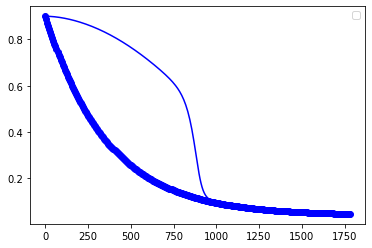

In [11]:
wt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,witB=witB,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
ax.plot(t/60,witB[:,0],"bo")
ax.plot(t/60,wt[:,0],'b',label="Non-ideal and wiB(t)")
plt.legend("")

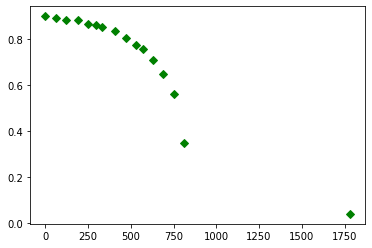

In [12]:
ax.plot(texp/60,ww_exp,"gD")
ARDwiB=np.sum(np.abs(1-np.interp(texp,t,wt[:,0])/ww_exp))

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2206881 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.293291 seconds ----------------
iter 0: ||F|| = 0.00720211, sigma = 1
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.4337942 seconds ----------------
iter 1: ||F|| = 0.00719111, sigma = 653.698
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.4762129 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.7402652 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.5027891 seconds ----------------
iter 2: ||F|| = 0.00571173, sigma = 568.994
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.43171

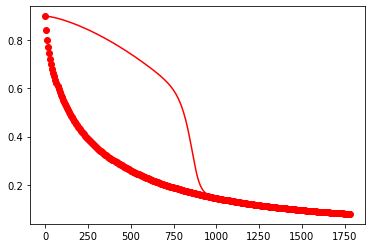

In [13]:
# taui=np.asarray([85711.02587])
taui=np.asarray([62711.02587])
witB=time_dep_surface(t,wi0,wi8,mobile,taui,lngi_fun=lngi_fun)
wt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,witB=witB,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
ax.plot(t/60,witB[:,0],"ro")
ax.plot(t/60,wt[:,0],'r',label="Non-ideal and aiB(t)")

In [14]:
ARDaiB=np.sum(np.abs(1-np.interp(texp,t,wt[:,0])/ww_exp))
print(ARDwiB)
print(ARDaiB)

1.0458005564092046
1.956735948798225


In [15]:
plt.show()